In [4]:
from pyspark.ml import PipelineModel
model2 = PipelineModel.load("vvvyes3")

In [3]:
x = "2019"
y = "2018"
z = "2017"
with open('yearJson.json', 'r') as f_input:
    for line in f_input:

        st = line
        searchStr = 'text'
        searchStr2 = 'text":'
        created_at = st[:st.find(searchStr)]  # From created_at filed until Text
        if x in created_at:
            
            text = st[st.find(searchStr2) + len(searchStr2):] 
            f_output = open('20191_1clean.txt', 'a')
            f_output.write(created_at + searchStr2 + text)

        elif y in created_at:
            text = st[st.find(searchStr2) + len(searchStr2):]  # From text filed until the end
            f_output = open('20181_1clean.txt' , 'a')
            f_output.write(created_at + searchStr2 + text)


        elif z in created_at:
            text = st[st.find(searchStr2) + len(searchStr2):]  # From text filed until the end
            f_output = open('20171_1clean.txt', 'a')
            f_output.write(created_at + searchStr2 + text)


f_input.close()

In [97]:
from pyspark.sql import SparkSession
jobDir = '20191_1clean.txt' # new data without label
tweets = spark.read.json([jobDir])
tweets.count() 

tweets = tweets.select("text")
df= model2.transform(tweets)

In [98]:
from pyspark.sql import SparkSession
jobDir = '20181_1clean.txt' # new data without label
tweets = spark.read.json([jobDir])
tweets.count() 

tweets = tweets.select("text")
df2 = model2.transform(tweets)

In [99]:
from pyspark.sql import SparkSession
jobDir = '20171_1clean.txt' # new data without label
tweets = spark.read.json([jobDir])
tweets.count() 

tweets = tweets.select("text")
df3 = model2.transform(tweets)

In [100]:
import matplotlib.pyplot as plt 
import pandas as pd
from collections import Counter

x1=df.filter(df['prediction'] == 0).count()
y1=df.filter(df['prediction'] == 1).count()
z1=df.filter(df['prediction'] == 2).count()

In [101]:
x2=df2.filter(df2['prediction'] == 0).count()
y2=df2.filter(df2['prediction'] == 1).count()
z2=df2.filter(df2['prediction'] == 2).count()

In [102]:
x3=df3.filter(df3['prediction'] == 0).count()
y3=df3.filter(df3['prediction'] == 1).count()
z3=df3.filter(df3['prediction'] == 2).count()

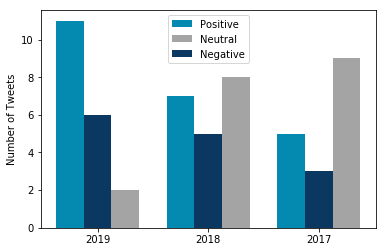

In [103]:
import json
#from pprint import pprint
import numpy as np
import matplotlib.pyplot as plt

class js:
    def __init__(self):
        self.bar1=[]
        self.bar2=[]
        self.bar3=[]
        
        self.read()
        

   
    def read(self):
        counter1 = 0
        counter2 = 0
        counter3 = 0
        
        counter1 = x1
        counter2 = y1
        counter3 = z1
        self.bar1.append(counter1)
        self.bar2.append(counter2)
        self.bar3.append(counter3)
        counter1=0
        counter2=0
        counter3=0
            

        counter1 = x2
        counter2 = y2
        counter3 = z2
        self.bar1.append(counter1)
        self.bar2.append(counter2)
        self.bar3.append(counter3)
        counter1=0
        counter2=0
        counter3=0
            
        counter1 = x3
        counter2 = y3
        counter3 = z3
        self.bar1.append(counter1)
        self.bar2.append(counter2)
        self.bar3.append(counter3)
        counter1=0
        counter2=0
        counter3=0

        self.draw()

    def draw(self):
        # width of the bars
        barWidth = 0.25
        bars1=self.bar1
        bars2=self.bar2
        bars3=self.bar3
       

        # The x position of bars
        r1 = np.arange(len(bars1))
        r2 = [x + barWidth for x in r1]
        r3 = [x + barWidth for x in r2]
        
           
        # Create Positive bars
        plt.bar(r1, bars1, width = barWidth, color = '#0489B1', label='Positive')
        # Create Neutral bars
        plt.bar(r3, bars3, width = barWidth, color = '#A4A4A4', label='Neutral')
        # Create Negative bars
        plt.bar(r2, bars2, width=barWidth, color='#0B3861', label='Negative')
        
        plt.xticks([r + barWidth for r in range(len(bars1))], ['2019', '2018', '2017'])
        plt.ylabel('Number of Tweets')
        plt.legend()

        # Show graphic
        plt.show()
            
js()


